<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/Object_Recognition_Using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from zipfile import ZipFile

In [ ]:
#install kaggle
!pip install kaggle

In [ ]:
#configure the path for kaggle .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

 98% 702M/715M [00:06<00:00, 178MB/s]
100% 715M/715M [00:06<00:00, 119MB/s]


In [ ]:
#extract the compressed dataset
dataset = "/content/cifar-10.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 30.2 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile("/content/train.7z", mode="r")
archive.extract()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
filenames = os.listdir("/content/train")
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])

['2055.png', '25126.png', '25957.png', '35305.png', '31655.png']


In [ ]:
labels_df = pd.read_csv("/content/trainLabels.csv")
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df["label"].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dict = {"airplane": 0, "automobile": 1, "bird": 2, "cat": 3, "deer": 4, "dog": 5, "frog": 6, "horse": 7, "ship": 8, "truck": 9}
labels = [labels_dict[i] for i in labels_df["label"]]
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [ ]:
labels_df[labels_df["id"] == 7796]

,id,label
7795,7796,frog


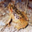

In [ ]:
#displaying sample image
img = cv2.imread("/content/train/7796.png")
cv2_imshow(img)

In [ ]:
id_list = list(labels_df["id"])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
#convert images to numpy arrays

train_data_folder = "/content/train/"
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)

type(data)

list

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
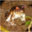

In [ ]:
data[0]

In [ ]:
#convert image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#scalling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled[0])

[[[0.81960784 0.82352941 0.79607843]
  [0.83529412 0.83921569 0.81960784]
  [0.85490196 0.85882353 0.84313725]
  ...
  [0.49803922 0.29019608 0.15294118]
  [0.47843137 0.26666667 0.1372549 ]
  [0.45490196 0.24705882 0.1254902 ]]

 [[0.82352941 0.82352941 0.79215686]
  [0.83529412 0.83921569 0.81176471]
  [0.85490196 0.8627451  0.83921569]
  ...
  [0.48627451 0.2745098  0.1372549 ]
  [0.4745098  0.2627451  0.12941176]
  [0.48235294 0.27058824 0.14117647]]

 [[0.80784314 0.80392157 0.76470588]
  [0.81960784 0.81960784 0.79215686]
  [0.83529412 0.84313725 0.81960784]
  ...
  [0.48627451 0.2745098  0.14509804]
  [0.51372549 0.30196078 0.16470588]
  [0.51372549 0.30588235 0.16078431]]

 ...

 [[0.49803922 0.42352941 0.38039216]
  [0.54117647 0.47843137 0.43137255]
  [0.55294118 0.49803922 0.4627451 ]
  ...
  [0.61960784 0.58431373 0.5254902 ]
  [0.63137255 0.61176471 0.59215686]
  [0.53333333 0.5372549  0.58039216]]

 [[0.56862745 0.50980392 0.46666667]
  [0.58039216 0.52941176 0.50196078]


In [ ]:
#building the neural network

num_of_classes = 10

#setting up the layers of Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(num_of_classes, activation="softmax")
])

#compile the neural network
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


#train the neural network
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 17s 14ms/step - loss: 2.0943 - acc: 0.2050 - val_loss: 1.9957 - val_acc: 0.2350
Epoch 2/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.9885 - acc: 0.2397 - val_loss: 1.9768 - val_acc: 0.2412
Epoch 3/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.9596 - acc: 0.2465 - val_loss: 1.9423 - val_acc: 0.2420
Epoch 4/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.9487 - acc: 0.2476 - val_loss: 1.9233 - val_acc: 0.2473
Epoch 5/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.9390 - acc: 0.2512 - val_loss: 1.9240 - val_acc: 0.2482
Epoch 6/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.9338 - acc: 0.2542 - val_loss: 1.9140 - val_acc: 0.2455
Epoch 7/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.9304 - acc: 0.2515 - val_loss: 1.9127 - val_acc: 0.2558
Epoch 8/10
1125/1125 [==============================] - 6s 6

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation="softmax"))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss="sparse_categorical_crossentropy", metrics=["acc"])

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
 478/1125 [===========>..................] - ETA: 6:36:32 - loss: 2.4686 - acc: 0.1459

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy = ", accuracy)

In [ ]:
h = history

#plot the loss value
plt.plot(h.history["loss"], label="train loss")
plt.plot(h.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history["acc"], label="train accuracy")
plt.plot(h.history["val_acc"], label = "validation accuracy")
plt.legend()
plt.show()